<a href="https://colab.research.google.com/github/narhelmi/ML_algorithm_selection_narges/blob/main/algorithm_selection_narges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 91353    0 91353    0     0   159k      0 --:--:-- --:--:-- --:--:--  159k
Archive:  wine+quality.zip
  inflating: winequality-red.csv     
  inflating: winequality-white.csv   
  inflating: winequality.names       
sample_data  winequality.names	winequality-red.csv  winequality-white.csv  wine+quality.zip
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulf

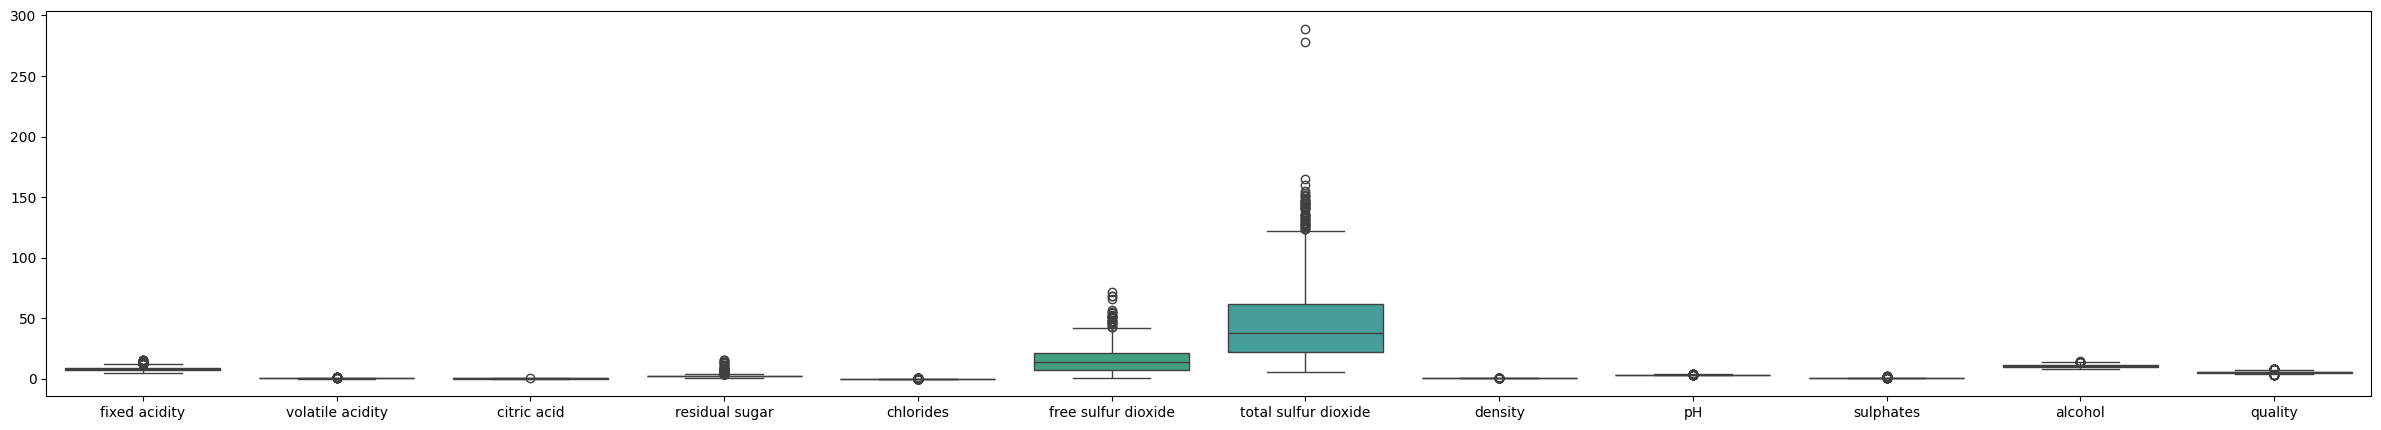

Linear Regression For Unscaled Data:
 Mean Squared Error: 0.4093840151042242
 RMSE : 0.6398312395501052
 R²: 0.41833853912568775
....................................................................................................
Linear Regression For Scaled Data:
 Mean Squared Error: 0.409384015104224
 RMSE: 0.6398312395501051
 R²: 0.4183385391256881
....................................................................................................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


....................................................................................................
Logistic Regression for Unscaled
 Accuracy : 0.615625
 R2 : 0.3473102912405822
....................................................................................................
Logistic Regression for Scaled
 Accuracy : 0.6125
 R2 : 0.3295500270566525
....................................................................................................
SVM for Unscaled
 Accuracy : 0.503125
 R2 : -0.047855586851854426
....................................................................................................
SVM for Scaled
 Accuracy : 0.640625
 R2 : 0.3473102912405822
....................................................................................................
Random Forest for Unscaled
 Accuracy : 0.725
 R2 : 0.42723148006826606
....................................................................................................
Random Forest for Scaled
 Accuracy : 0.725

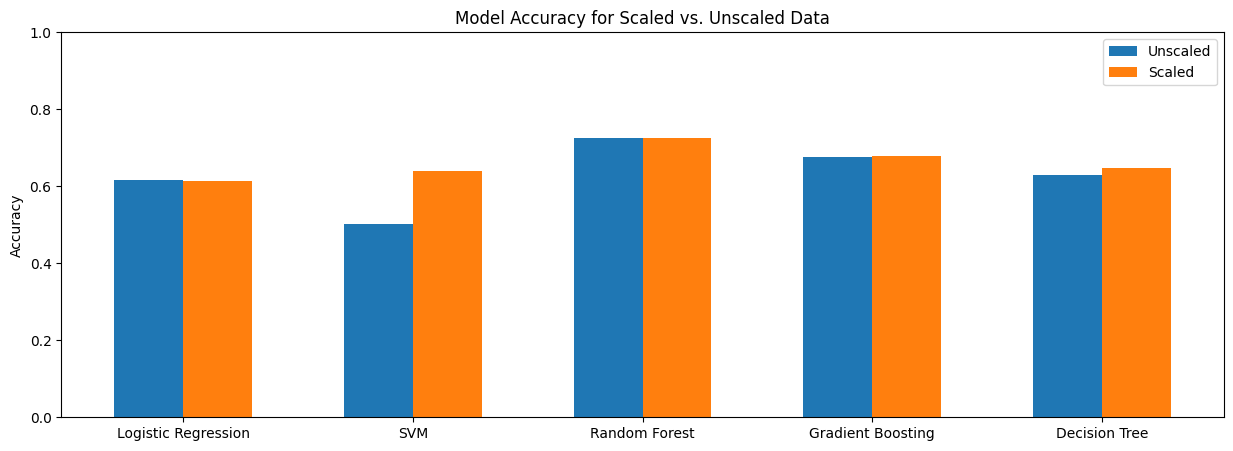

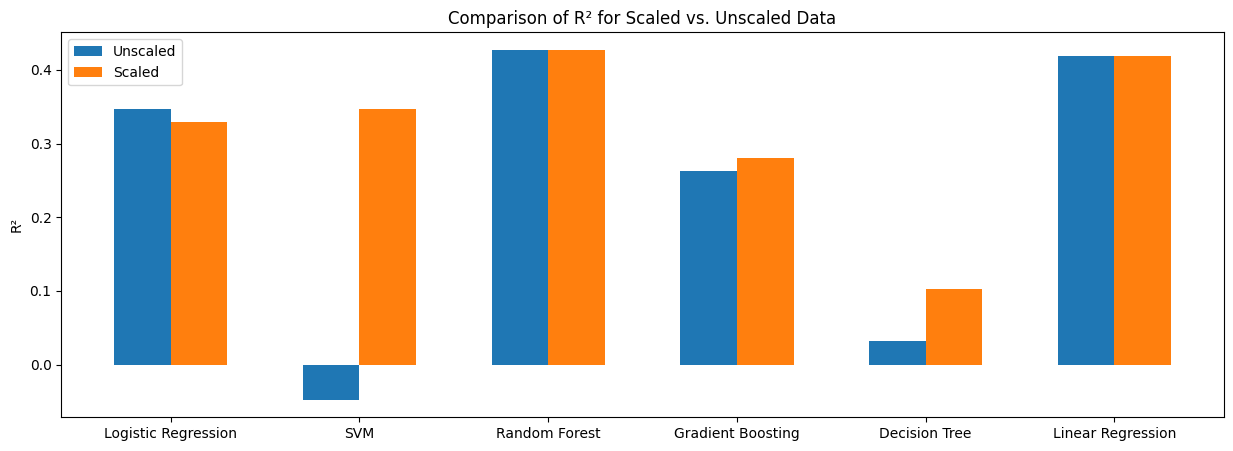

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Download dataset
!curl https://archive.ics.uci.edu/static/public/186/wine+quality.zip -O -J -L && unzip -o wine+quality.zip
!ls

# Load the dataset
path = './winequality-red.csv'
df = pd.read_csv(path, delimiter=';')

# Display dataset information and a sample
print(df.info())
print(df.sample())

# Visualize the dataset
plt.figure(figsize=(30, 5))
sns.boxplot(data=df)
plt.show()

# Data preprocessing
feature = df.drop('quality', axis=1)
target = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=40)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lin_reg = LinearRegression()
lin_reg_scaled = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_scaled.fit(X_train_scaled, y_train)

# Make predictions with Linear Regression
y_test_pred_reg = lin_reg.predict(X_test)
y_test_pred_Scaled_reg = lin_reg_scaled.predict(X_test_scaled)

# Evaluate Linear Regression
mse_test = mean_squared_error(y_test, y_test_pred_reg)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_reg))
mse_test_scaled = mean_squared_error(y_test, y_test_pred_Scaled_reg)
linear_reg_rmse_scaled = np.sqrt(mean_squared_error(y_test, y_test_pred_Scaled_reg))
linear_reg_r2 = r2_score(y_test, y_test_pred_reg)
linear_reg_r2_scaled = r2_score(y_test, y_test_pred_Scaled_reg)

# Print Linear Regression results
print("Linear Regression For Unscaled Data:")
print(f" Mean Squared Error: {mse_test}")
print(f" RMSE : {linear_reg_rmse}")
print(f" R²: {linear_reg_r2}")
print(100 * '.')

print("Linear Regression For Scaled Data:")
print(f" Mean Squared Error: {mse_test_scaled}")
print(f" RMSE: {linear_reg_rmse_scaled}")
print(f" R²: {linear_reg_r2_scaled}")
print(100 * '.')

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(random_state=40),
    'Random Forest': RandomForestClassifier(random_state=40),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Data types
data_types = {
    'Unscaled': (X_train, X_test),
    'Scaled': (X_train_scaled, X_test_scaled)
}

# Evaluate models
results = {
    'Model': [],
    'Data Type': [],
    'Accuracy': [],
    'R2': []
}

for model_name, model in models.items():
    for data_type, (X_train_set, X_test_set) in data_types.items():
        model.fit(X_train_set, y_train)
        y_pred = model.predict(X_test_set)
        accuracy = accuracy_score(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results['Model'].append(model_name)
        results['Data Type'].append(data_type)
        results['Accuracy'].append(accuracy)
        results['R2'].append(r2)
        print(100 * '.')
        print(f"{model_name} for {data_type}")
        print(f" Accuracy : {accuracy}")
        print(f" R2 : {r2}")



# Add Linear Regression R² results
results['Model'].extend(['Linear Regression'] * 2)
results['Data Type'].extend(['Unscaled', 'Scaled'])
results['Accuracy'].extend([None, None])
results['R2'].extend([linear_reg_r2, linear_reg_r2_scaled])

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot the accuracy results
plt.figure(figsize=(15, 5))
colors = ['#1f77b4', '#ff7f0e']  # Colors for unscaled and scaled data
bar_width = 0.3


for i, model_name in enumerate(models.keys()):
    unscaled_acc = results_df[(results_df['Model'] == model_name) & (results_df['Data Type'] == 'Unscaled')]['Accuracy'].values[0]
    scaled_acc = results_df[(results_df['Model'] == model_name) & (results_df['Data Type'] == 'Scaled')]['Accuracy'].values[0]

    plt.bar(i - bar_width/2, unscaled_acc, bar_width, label='Unscaled' if i == 0 else "", color=colors[0])
    plt.bar(i + bar_width/2, scaled_acc, bar_width, label='Scaled' if i == 0 else "", color=colors[1])


plt.title('Model Accuracy for Scaled vs. Unscaled Data')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(range(len(models)), models.keys())
plt.legend()
plt.show()

# Plot the R² results
plt.figure(figsize=(15, 5))


for i, model_name in enumerate(results_df['Model'].unique()):
    unscaled_r2 = results_df[(results_df['Model'] == model_name) & (results_df['Data Type'] == 'Unscaled')]['R2'].values[0]
    scaled_r2 = results_df[(results_df['Model'] == model_name) & (results_df['Data Type'] == 'Scaled')]['R2'].values[0]

    plt.bar(i - bar_width/2, unscaled_r2, bar_width, label='Unscaled' if i == 0 else "", color=colors[0])
    plt.bar(i + bar_width/2, scaled_r2, bar_width, label='Scaled' if i == 0 else "", color=colors[1])

plt.title('Comparison of R² for Scaled vs. Unscaled Data')
plt.ylabel('R²')
plt.xticks(range(len(results_df['Model'].unique())), results_df['Model'].unique())
plt.legend()
plt.show()